In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

In [2]:
diamonds_test = pd.read_csv("diamonds_test.csv") # cargamos fichero
diamonds_test.head(5)                                   # visualizamos 5 primeras filas


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.55,Very Good,E,SI2,59.6,57.0,5.34,5.39,3.20
1,1,0.35,Ideal,G,SI1,60.6,56.0,4.56,4.58,2.77
2,2,1.53,Good,H,IF,63.1,57.0,7.25,7.34,4.60
3,3,0.52,Ideal,E,VS1,61.8,56.0,5.17,5.19,3.20
4,4,0.54,Ideal,D,SI1,62.6,55.0,5.19,5.23,3.26


In [3]:

diamonds_train = pd.read_csv("diamonds_train.csv")

diamonds_train.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.43,Very Good,E,SI2,59.9,57.0,671,4.88,4.94,2.94
1,1.15,Good,H,SI1,60.2,61.0,5005,6.74,6.84,4.09
2,0.52,Ideal,E,VS2,61.3,56.0,1621,5.17,5.21,3.18
3,0.32,Ideal,G,VVS2,61.7,57.0,730,4.41,4.44,2.73
4,1.00,Premium,D,SI1,61.4,58.0,5880,6.43,6.37,3.93


In [4]:
diamonds_train.dtypes != 'object'

carat       True
cut        False
color      False
clarity    False
depth       True
table       True
price       True
x           True
y           True
z           True
dtype: bool

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_copy = diamonds_train

le.fit(data_copy['cut'])

data_copy['cut'] = le.transform(data_copy['cut'])

le.fit(data_copy['color'])

data_copy['color'] = le.transform(data_copy['color'])

le.fit(data_copy['clarity'])

data_copy['clarity'] = le.transform(data_copy['clarity'])

data_copy.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.43,4,1,3,59.9,57.0,671,4.88,4.94,2.94
1,1.15,1,4,2,60.2,61.0,5005,6.74,6.84,4.09
2,0.52,2,1,5,61.3,56.0,1621,5.17,5.21,3.18
3,0.32,2,3,7,61.7,57.0,730,4.41,4.44,2.73
4,1.00,3,0,2,61.4,58.0,5880,6.43,6.37,3.93


In [6]:
data_copy.dtypes != 'object'

carat      True
cut        True
color      True
clarity    True
depth      True
table      True
price      True
x          True
y          True
z          True
dtype: bool

In [7]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.799810,0.474396,0.2,0.40,0.70,1.04,5.01
cut,43152.0,2.554551,1.029963,0.0,2.00,2.00,3.00,4.00
color,43152.0,2.599068,1.704806,0.0,1.00,3.00,4.00,6.00
clarity,43152.0,3.830854,1.723785,0.0,2.00,4.00,5.00,7.00
depth,43152.0,61.752361,1.439128,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.462706,2.229668,43.0,56.00,57.00,59.00,76.00
price,43152.0,3942.483384,3990.866274,326.0,954.00,2421.00,5335.00,18823.00
x,43152.0,5.735674,1.121841,0.0,4.72,5.70,6.54,10.74
y,43152.0,5.739552,1.149528,0.0,4.73,5.71,6.54,58.90
z,43152.0,3.541920,0.708278,0.0,2.91,3.53,4.04,31.80


Pasamos a analizar la correlacion entre variables

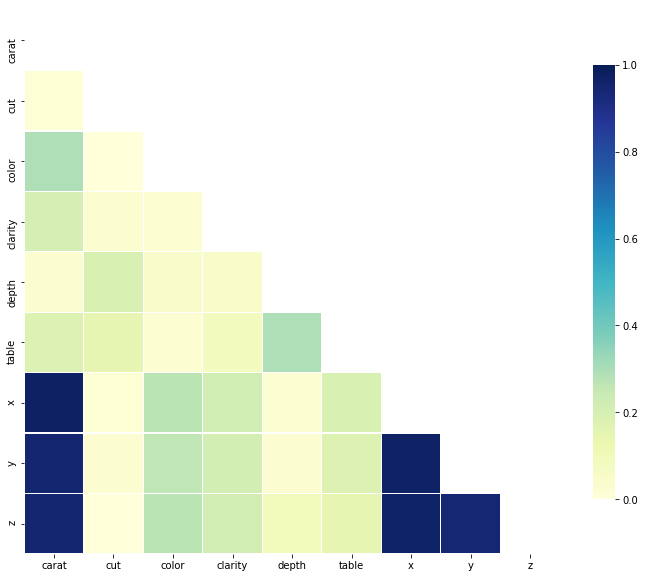

In [8]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data_copy.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Vemos como X-Caracter , X-Y, y-Z comparten una fuerte correlacion por tanto vamos a eliminar X,Y,Z

In [9]:
data_copy.corr() # matriz de correlación

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017271,0.294294,-0.210476,0.027871,0.181259,0.921776,0.974838,0.946150,0.949220
cut,0.017271,1.000000,0.002578,0.029913,-0.193748,0.148879,0.041313,0.022503,0.027724,0.002821
color,0.294294,0.002578,1.000000,-0.026792,0.047012,0.024178,0.175640,0.272849,0.264690,0.269612
clarity,-0.210476,0.029913,-0.026792,1.000000,-0.051781,-0.089803,-0.067741,-0.220850,-0.211791,-0.218680
depth,0.027871,-0.193748,0.047012,-0.051781,1.000000,-0.294847,-0.013078,-0.025326,-0.029666,0.094857
table,0.181259,0.148879,0.024178,-0.089803,-0.294847,1.000000,0.127091,0.194938,0.181993,0.149825
price,0.921776,0.041313,0.175640,-0.067741,-0.013078,0.127091,1.000000,0.884739,0.860887,0.857613
x,0.974838,0.022503,0.272849,-0.220850,-0.025326,0.194938,0.884739,1.000000,0.968965,0.966990
y,0.946150,0.027724,0.264690,-0.211791,-0.029666,0.181993,0.860887,0.968965,1.000000,0.943961
z,0.949220,0.002821,0.269612,-0.218680,0.094857,0.149825,0.857613,0.966990,0.943961,1.000000


In [10]:
data_copy_clean = data_copy
data_copy_clean = data_copy_clean.drop(['x','y','z'],axis=1)

In [11]:
data_copy_clean.corr()

,carat,cut,color,clarity,depth,table,price
carat,1.000000,0.017271,0.294294,-0.210476,0.027871,0.181259,0.921776
cut,0.017271,1.000000,0.002578,0.029913,-0.193748,0.148879,0.041313
color,0.294294,0.002578,1.000000,-0.026792,0.047012,0.024178,0.175640
clarity,-0.210476,0.029913,-0.026792,1.000000,-0.051781,-0.089803,-0.067741
depth,0.027871,-0.193748,0.047012,-0.051781,1.000000,-0.294847,-0.013078
table,0.181259,0.148879,0.024178,-0.089803,-0.294847,1.000000,0.127091
price,0.921776,0.041313,0.175640,-0.067741,-0.013078,0.127091,1.000000


In [12]:
data_copy_clean.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
dtype: bool

Una vez tenemos los datos limpios y hemos hecho un análisis exploratorio pasemos a analizar el mejor conjunto de características para poder entrenar nuestro modelo

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\alber\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alber\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


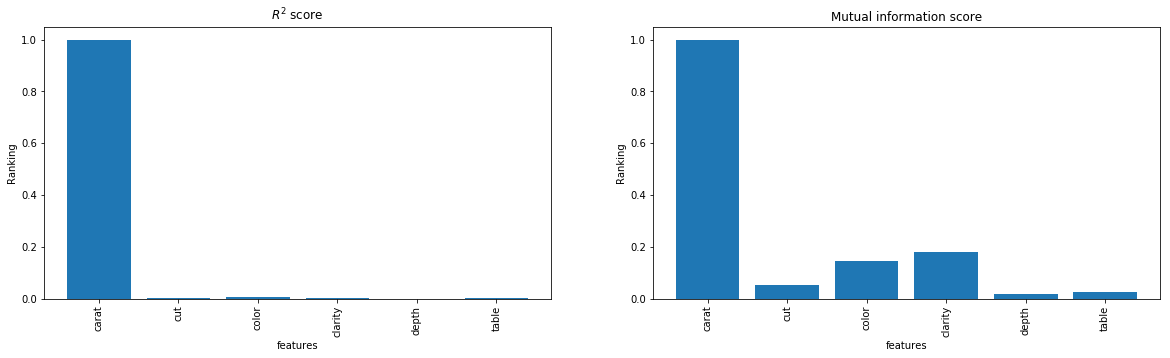

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = data_copy_clean.as_matrix() 

y = data[:,6:7]     # nos quedamos con la columna price
X = data[:,0:6]      # nos quedamos con el resto

feature_names = data_copy_clean.columns[0:6]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Vemos como carat clarity y color parecen las variables mas importantes

A partir de ahora analizaremos la matriz de confunsion en diferentes modelos con algoritmos de machine learning y miraremos las métricas cual es la que mejor se ajusta

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [15]:
# preparamos los datos
data_copy_clean_2 = data_copy_clean

features = data_copy_clean_2.columns.drop(['price'])
X = data_copy_clean_2[features].values
y = data_copy_clean_2['price'].values

print('Filas, columnas', X.shape)

Filas, columnas (43152, 6)


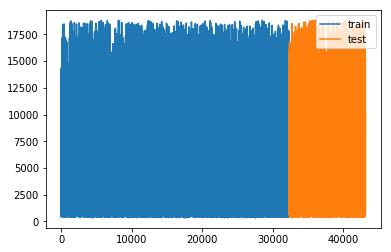

In [16]:
# Paso 1:
offset = 10788

X_train = X[:-offset, :]
y_train = y[:-offset]
X_test  = X[-offset:, :]
y_test  = y[-offset:]

plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y)),y_test,label='test')
plt.legend()
plt.show()

Busquemos los parametros libres utilicemos un algoritmo Lasso primero de todo

In [17]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso

tscv = TimeSeriesSplit(n_splits=3)

alpha_vector = np.logspace(-4,4,20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = tscv.split(X_train)).fit(X_train, y_train)

best mean cross-validation score: 0.881
best parameters: {'alpha': 0.08858667904100823}


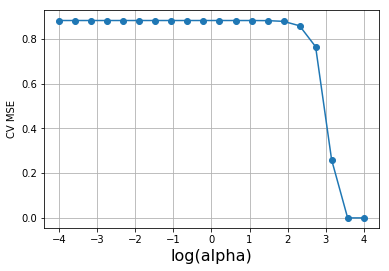

In [18]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.9e+06
MSE Modelo Lasso (test) : 1.9e+06
carat 8331.033755683637
cut 75.21513368995431
color -255.07915760757425
clarity 299.90832963593164
depth -119.60236362819435
table -96.81328706377589


Vemos como train y test es lo mismo. Y las variables mas relevantes son de lejos carat, esta altamente relacionada, y después el color. A mayor precio menor color. Y la claridad, mayor claridad mayor precio.

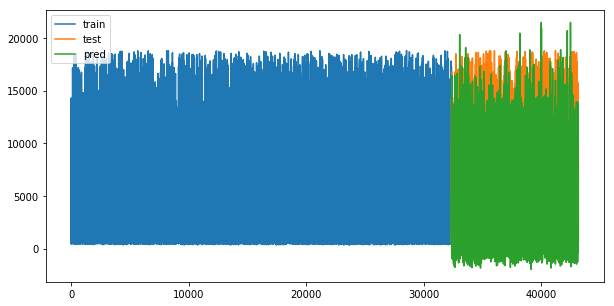

In [20]:
# your code here
plt.figure(figsize=(10,5))
plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y)),y_test,label='test')
plt.plot(range(len(y_train),len(y)),ytestLasso,label='pred')
plt.legend()
plt.show()

Random forest

In [21]:
from sklearn.model_selection import train_test_split

# convertimos el DataFrame al formato necesario para scikit-learn
data = data_copy_clean.values 

y = data[:,6:7]     # nos quedamos con la columna price
X = data[:,0:6]      # nos quedamos con el resto

feature_names = data_copy_clean.columns[0:6]

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (32364, 6)
Datos test:  (10788, 6)


best mean cross-validation score: 0.974
best parameters: {'max_depth': 11}


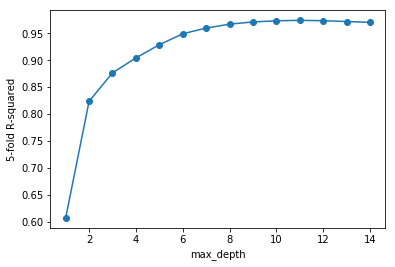

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Tu código aquí
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=tuned_parameters, cv = 5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold R-squared')
plt.show()

In [23]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
dt = DecisionTreeRegressor(max_depth=maxDepthOptimo-1).fit(X_train,y_train)

print("Train: ",dt.score(X_train,y_train))
print("Test: ", dt.score(X_test,y_test))

Train:  0.9812747323236134
Test:  0.975096675595524


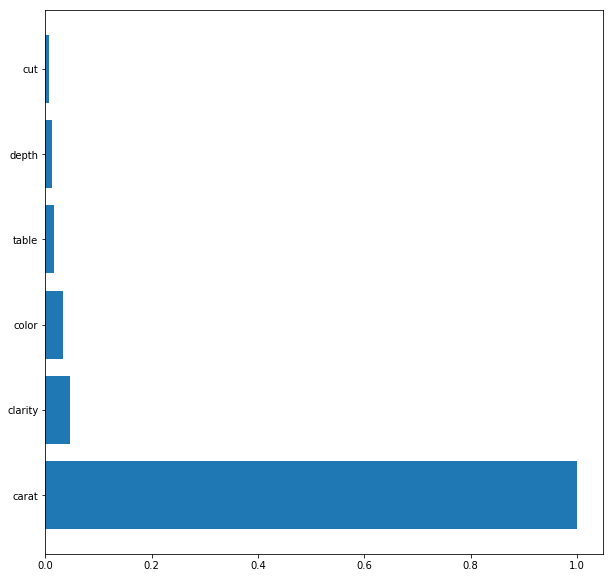

In [41]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Random forest

best mean cross-validation score: 0.973
best parameters: {'max_depth': 18}


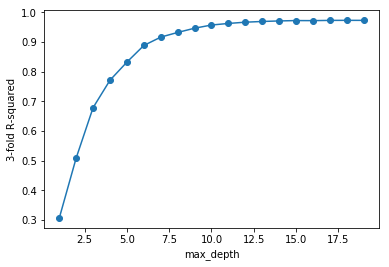

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Tu código aquí
# grid search
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, 
                                           n_estimators=100, 
                                           max_features='sqrt'), 
                                           param_grid=tuned_parameters, cv=3) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('3-fold R-squared')

plt.show()

In [25]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=11,
                                 n_estimators=100,
                                 max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.9740320001196009
Test:  0.965660233779863


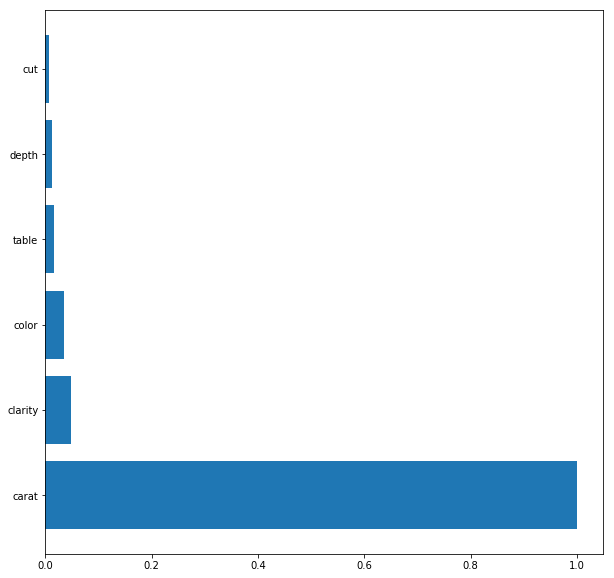

In [26]:
# Tu código aquí

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Boosted tree

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.980
best parameters: {'learning_rate': 0.1, 'n_estimators': 2000}


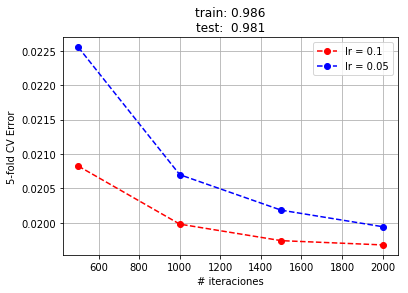

In [28]:
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 1500)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

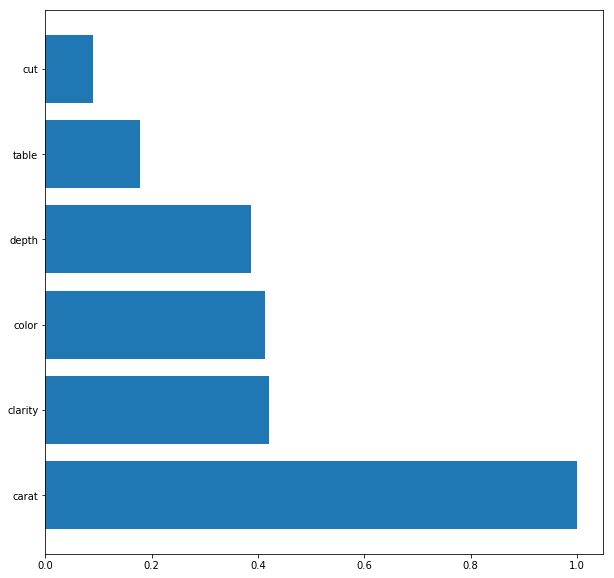

In [29]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

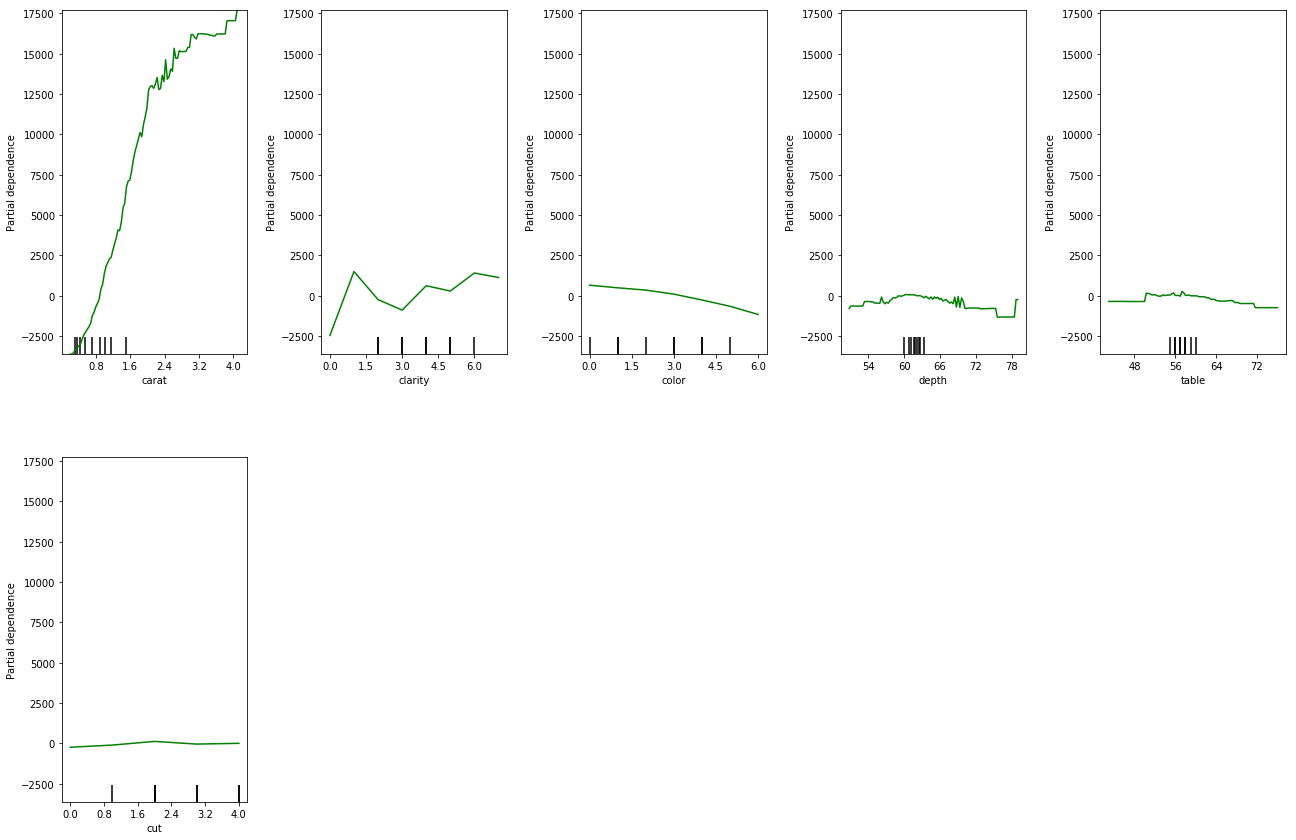

In [30]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, ax = plot_partial_dependence(bt, X_train, indices, feature_names=feature_names,
                                 percentiles=(0.0, 1.0), n_cols = 5)
fig.set_size_inches(20, 20)
plt.show()

SVM

In [31]:
from sklearn import preprocessing

# paso 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled  = scaler.transform(X_test)

Datos entrenamiento:  (32364, 6)
Datos test:  (10788, 6)


In [ ]:
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Despues de ver los resultados obtenidos con los algoritmos, parecen como que casi todos dan scores parecidas, por tanto utilizaremos un algoritmo sencillo como los árboles de decisión

In [32]:
data_copy = diamonds_test

le.fit(data_copy['cut'])

data_copy['cut'] = le.transform(data_copy['cut'])

le.fit(data_copy['color'])

data_copy['color'] = le.transform(data_copy['color'])

le.fit(data_copy['clarity'])

data_copy['clarity'] = le.transform(data_copy['clarity'])

data_copy.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.55,4,1,3,59.6,57.0,5.34,5.39,3.20
1,1,0.35,2,3,2,60.6,56.0,4.56,4.58,2.77
2,2,1.53,1,4,1,63.1,57.0,7.25,7.34,4.60
3,3,0.52,2,1,4,61.8,56.0,5.17,5.19,3.20
4,4,0.54,2,0,2,62.6,55.0,5.19,5.23,3.26


In [34]:
data_copy_clean_test = data_copy
data_copy_clean_test = data_copy_clean_test.drop(['x','y','z','id'],axis=1)

y_pred = dt.predict(data_copy_clean_test)

In [36]:
data_copy_clean_test_final = data_copy
data_copy_clean_test_final['target'] = y_pred
data_copy_clean_test_final = data_copy_clean_test_final.drop(['carat', 'cut','color','clarity','depth','table','x','y','z'], axis = 1)
data_copy_clean_test_final.to_csv('diamonds_test_result.csv')